In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/major_project/large/Insurance_Fraud_Detection/telematics_syn-032021.csv')
df.head(5)

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,2.0,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000


In [ ]:
df.shape

(100000, 52)

In [ ]:
df.isna().sum()

Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles       

In [ ]:
df.NB_Claim.value_counts()

0    95728
1     4061
2      200
3       11
Name: NB_Claim, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Insured.sex'] = le.fit_transform(df['Insured.sex'])
df['Marital'] = le.fit_transform(df['Marital'])
df['Car.use'] = le.fit_transform(df['Car.use'])
df['Region'] = le.fit_transform(df['Region'])

In [ ]:
df.head(3)

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,1,-1,0,1,609.0,1,6213.71,25,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753
1,182,44,0,3,0,1,575.0,1,12427.42,20,...,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840
2,184,48,0,6,0,1,847.0,1,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000


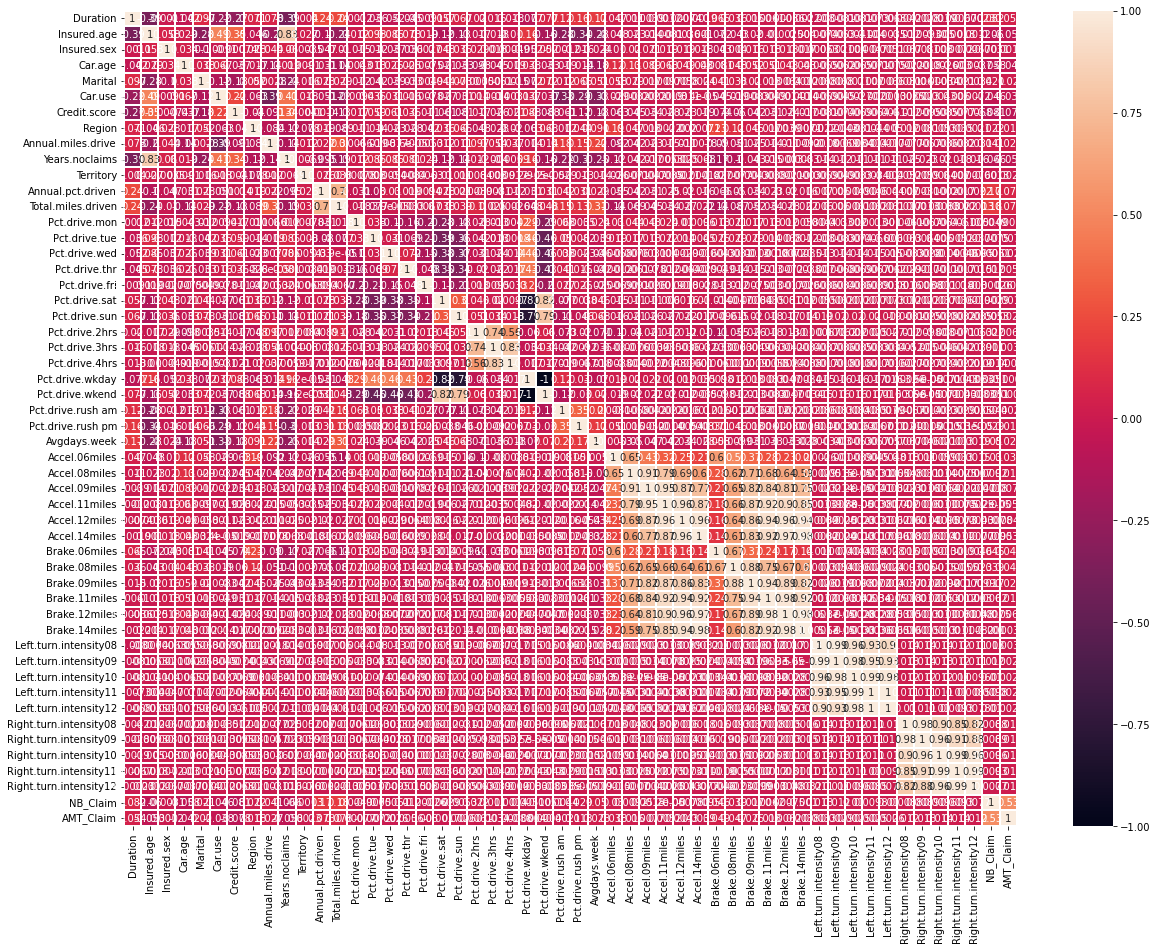

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
corrs = df.corr()['NB_Claim']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

NB_Claim                  1.000000
AMT_Claim                 0.528515
Total.miles.driven        0.181060
Annual.pct.driven         0.168464
Duration                  0.082083
Avgdays.week              0.050272
Brake.06miles             0.045633
Annual.miles.drive        0.041297
Brake.08miles             0.038756
Accel.06miles             0.030259
Pct.drive.rush pm         0.028721
Pct.drive.2hrs            0.022346
Region                    0.022334
Marital                   0.020760
Brake.09miles             0.016684
Left.turn.intensity08     0.013435
Pct.drive.thr             0.012478
Left.turn.intensity09     0.012205
Pct.drive.3hrs            0.010584
Left.turn.intensity10     0.010072
Left.turn.intensity12     0.009975
Left.turn.intensity11     0.009796
Right.turn.intensity10    0.009557
Right.turn.intensity11    0.009304
Accel.08miles             0.009168
Right.turn.intensity09    0.008940
Right.turn.intensity08    0.008840
Right.turn.intensity12    0.007664
Brake.11miles       

In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [ ]:
print(columns)

Index(['Duration', 'Marital', 'Region', 'Annual.miles.drive',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.thr', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs',
       'Pct.drive.wkday', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles',
       'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12', 'NB_Claim',
       'AMT_Claim'],
      dtype='object')


# feat=df.columns.values
feat= ['Duration', 'Marital', 'Region', 'Annual.miles.drive',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.thr', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs',
       'Pct.drive.wkday', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles',
       'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12', 'AMT_Claim']

In [ ]:
# feat=df.columns.values
feat= ['AMT_Claim','Total.miles.driven','Annual.pct.driven','Duration','Region','Avgdays.week',\
       'Brake.06miles','Annual.miles.drive', 'Accel.06miles','Marital','Left.turn.intensity08','Right.turn.intensity10']

In [ ]:
X = df[feat]
y = df.NB_Claim

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify=y)

In [ ]:
y_train.value_counts()

0    71796
1     3046
2      150
3        8
Name: NB_Claim, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, f1_score
parameters = {'bootstrap': True,
'min_samples_leaf': 2,
'n_estimators':100,
'min_samples_split':5,
'max_features': 'sqrt',
'max_depth': 15,
'class_weight':'balanced'
              
}
#Create a random forest classifier, 100 trees
clf_rf=RandomForestClassifier(**parameters)
#Train the model using the training sets
clf_rf.fit(X_train, y_train)
rf_pred = clf_rf.predict(X_test)
print("F1 Score:",f1_score(y_test, rf_pred,average='micro'))

F1 Score: 0.99512


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,rf_pred))  
print(classification_report(y_test,rf_pred))  
print("Accuracy:",accuracy_score(y_test, rf_pred))

[[23932     0     0     0]
 [   88   926     1     0]
 [    3    27    20     0]
 [    0     3     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23932
           1       0.97      0.91      0.94      1015
           2       0.95      0.40      0.56        50
           3       0.00      0.00      0.00         3

    accuracy                           1.00     25000
   macro avg       0.73      0.58      0.63     25000
weighted avg       0.99      1.00      0.99     25000

Accuracy: 0.99512


In [ ]:
from xgboost import plot_importance
from xgboost import XGBClassifier as xgb
# XGB Classifier
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=12,
    min_child_weight=5,
    gamma=0,
    subsample=0.5,
    colsample_bytree=0.3,
    objective= 'multi:softmax',
    nthread=5,
    scale_pos_weight=13,
    reg_lambda=4,
    alpha=0,
    base_score=0.5,
    seed=123,
    random_state=45
)
clf_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, colsample_bytree=0.3, max_depth=12, min_child_weight=5,
              nthread=5, objective='multi:softprob', random_state=45,
              reg_lambda=4, scale_pos_weight=13, seed=123, subsample=0.5)

In [ ]:
xg_pred = clf_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,xg_pred))  
print(classification_report(y_test,xg_pred))  
print("Accuracy:",accuracy_score(y_test, xg_pred))

[[23932     0     0     0]
 [   95   920     0     0]
 [    3    42     5     0]
 [    0     3     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23932
           1       0.95      0.91      0.93      1015
           2       1.00      0.10      0.18        50
           3       0.00      0.00      0.00         3

    accuracy                           0.99     25000
   macro avg       0.74      0.50      0.53     25000
weighted avg       0.99      0.99      0.99     25000

Accuracy: 0.99428


In [ ]:
# import pickle
# # Save trained model to file
# pickle.dump(clf_xgb, open("/content/drive/MyDrive/Insurance_Fraud_Detection/Insurance_Model/insurance_dd2.pkl", "wb"))

PermissionError: ignored